# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
path=r'C:\Users\ANIL\Desktop\python\K Means'
os.chdir(path)

In [3]:
dataset=pd.read_csv('Wholesale customers data.csv')
dataset.head(30)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
dataset.shape

(440, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
dataset.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

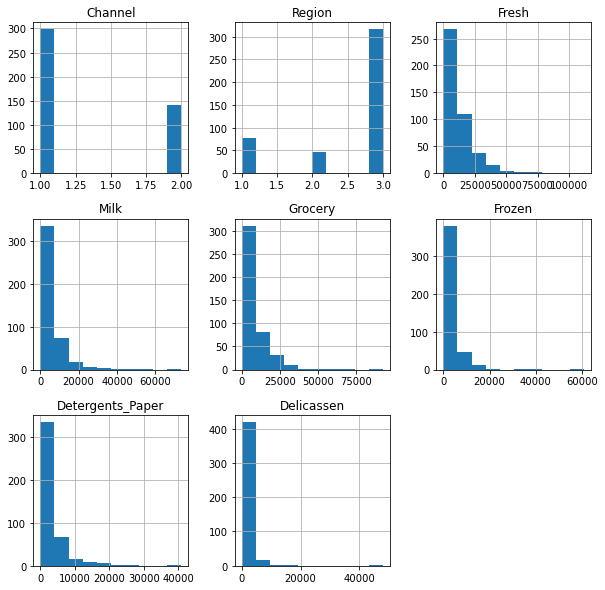

In [8]:
dataset.hist(figsize=(10,10))

In [11]:
X = dataset.iloc[:, [2,4]].values

In [12]:
dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Using the elbow method to find the optimal number of clusters

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


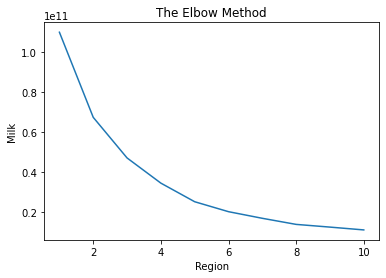

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Region')
plt.ylabel('Milk')
plt.show()

In [14]:
km = KMeans(n_clusters =4, n_jobs = 10, random_state=21)
km.fit(X)

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=10, random_state=21)

In [15]:
centers = km.cluster_centers_
print(centers)

[[ 5614.48846154  5576.73846154]
 [49475.65217391  5874.82608696]
 [ 7755.0212766  28598.72340426]
 [21072.16363636  5175.9       ]]


In [16]:
kmeans5 = KMeans(n_clusters=4)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[3 3 3 3 0 3 3 3 3 1 3 3 0 0 0 3 3 3 0 3 0 3 0 0 0 0 3 0 1 2 0 3 0 0 3 3 0
 0 3 2 0 0 3 1 3 1 1 1 3 1 3 3 2 3 0 3 1 3 0 3 3 1 3 3 3 1 3 0 3 3 0 1 3 0
 3 0 3 1 3 3 3 3 3 0 3 1 1 2 3 0 3 3 1 3 3 3 3 3 3 3 3 3 3 2 0 0 3 3 3 1 3
 1 0 0 0 3 3 3 0 3 0 3 3 3 2 2 0 0 3 2 3 3 0 3 3 3 3 3 0 3 0 0 2 3 0 1 3 3
 3 0 0 3 0 3 3 1 3 0 3 3 3 3 0 1 3 1 3 3 3 3 3 1 3 1 3 3 2 3 3 3 3 2 3 2 3
 3 3 3 3 3 0 0 3 1 3 0 0 3 3 3 1 1 0 3 3 1 3 3 3 3 0 1 3 3 3 3 1 0 3 3 0 3
 3 3 3 3 0 3 3 3 3 3 0 3 0 3 3 0 3 2 0 0 0 3 3 3 3 0 0 3 3 1 3 0 3 0 3 3 2
 2 3 3 0 3 3 3 1 0 1 0 3 3 3 2 3 3 0 3 3 0 3 3 2 0 2 2 3 0 0 2 3 3 3 3 0 3
 0 3 3 3 0 1 3 3 1 3 1 0 3 3 3 0 1 3 3 3 3 3 3 1 3 3 0 3 0 0 3 3 0 3 3 1 0
 1 0 0 0 3 3 3 3 3 3 1 3 3 3 0 3 1 3 1 3 1 0 3 0 1 3 3 0 3 3 3 3 3 3 3 0 3
 2 0 3 0 3 3 3 2 3 3 0 0 0 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 0 0 0 0 3 0
 1 3 3 3 3 3 3 3 3 3 3 1 3 3 0 0 0 0 3 3 0 3 3 3 3 0 3 0 0 2 1 3 3]


array([[21072.16363636,  5175.9       ],
       [ 7755.0212766 , 28598.72340426],
       [49475.65217391,  5874.82608696],
       [ 5614.48846154,  5576.73846154]])

## Training the K-Means model on the dataset

In [17]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

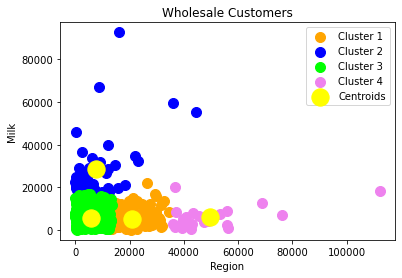

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lime', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Wholesale Customers')
plt.xlabel('Region')
plt.ylabel('Milk')
plt.legend()
plt.show()